### Verificación del entorno de Python

Antes de empezar con el análisis, verificamos la versión de Python
y el entorno activo para asegurarnos de que el notebook está
usando el intérprete correcto.


In [2]:
import sys
print(sys.version)
print(sys.executable)


3.13.9 | packaged by conda-forge | (main, Oct 22 2025, 23:12:41) [MSC v.1944 64 bit (AMD64)]
c:\Users\Usuario\miniconda3\envs\mienv3\python.exe


### Verificación de Pandas

Comprobamos que la librería Pandas está instalada y la versión utilizada,
ya que será la principal herramienta para manipulación y análisis de datos.


In [3]:
import pandas as pd
print(pd.__version__)


2.3.3


### Carga del dataset de canciones de Spotify

Cargamos el CSV que contiene información de 2000 canciones
con sus características musicales, popularidad, duración, género, etc.
Luego mostramos las primeras filas para tener una idea general
de las columnas y el formato de los datos.


In [4]:
df = pd.read_csv("../data/raw/songs_normalize.csv")
df.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


### Observaciones iniciales

- El dataset tiene 18 columnas que incluyen información del artista,
  nombre de la canción, características musicales y género.
- Las primeras filas muestran que:
  - `explicit` es booleano,
  - `year` y `popularity` son enteros,
  - `danceability`, `energy` y otras medidas son floats entre 0 y 1.
- La columna `genre` a veces contiene **múltiples géneros separados por comas**.
- Esto nos indica que necesitaremos explorar y limpiar ciertos campos
  antes de hacer análisis más profundos.


### Dimensiones del dataset

Verificamos cuántas filas y columnas tiene el dataset
para entender su tamaño y planificar el análisis.


In [5]:
df.shape

(2000, 18)

### Observaciones sobre dimensiones

- El dataset contiene **2000 canciones** (filas) y **18 columnas**.  
- Esto confirma que tenemos un tamaño manejable para análisis exploratorio y visualizaciones.  
- Cada fila representa una canción única y cada columna una característica o métrica relacionada con la canción.


### Información general del dataset

Vamos a revisar los tipos de datos de cada columna y si hay valores que faltan usando `df.info()`.


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


### Observaciones de df.info()

- El dataset tiene **2000 filas** y **18 columnas**.
- Columnas numéricas (int64 o float64): `duration_ms`, `year`, `popularity`, `danceability`, `energy`, `key`, `loudness`, `mode`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`.
- Columnas categóricas (object o bool): `artist`, `song`, `explicit`, `genre`.
- **No hay valores nulos**, por lo que no es necesario hacer limpieza de nulos por ahora.
- La columna `explicit` es booleana (True/False), y `mode` y `key` son enteros pero representan categorías musicales.


### Estadísticas básicas del dataset

Vamos a revisar estadísticas descriptivas de las columnas numéricas para entender rangos, medias y percentiles.


In [7]:
# Estadísticas de columnas numéricas
df.describe()


,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


### Observaciones de estadísticas descriptivas

- **Duración de canciones (`duration_ms`)**: promedio ~228.748 ms (~3.8 min), mínima 113.000 ms y máxima 484.146 ms.  
- **Año de lanzamiento (`year`)**: va de 1998 a 2020, con mediana en 2010.  
- **Popularidad (`popularity`)**: promedio ~60, rango de 0 a 89.  
- **Métricas musicales**:
  - `danceability`: la mayoría de las canciones tienen valores entre 0.58 y 0.76.
  - `energy`: mediana ~0.736, con algunas canciones muy energéticas (~0.999) y otras más suaves (~0.0549).
  - `valence` (positividad de la canción): rango de 0.038 a 0.973, mediana ~0.558.
  - `tempo`: promedio ~120 BPM, mínimo ~60, máximo ~210 BPM.
- No hay valores nulos en ninguna columna numérica.


In [ ]:
### Distribución de Popularidad y Duración

Visualizamos cómo se distribuyen la popularidad y la duración de las canciones.


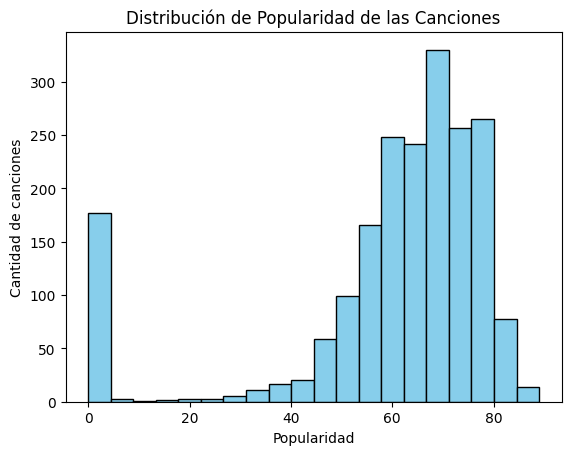

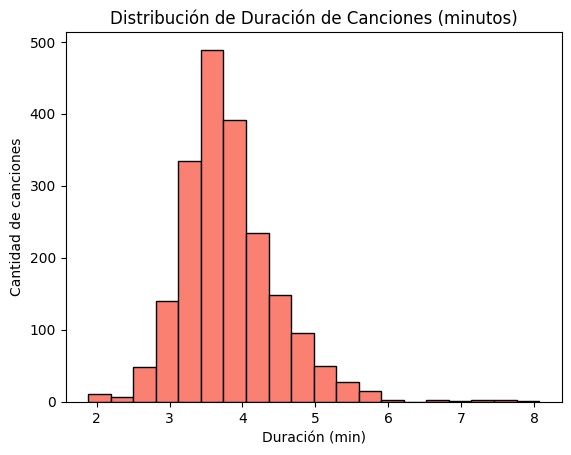

In [8]:
import matplotlib.pyplot as plt

# Histograma de popularidad
plt.hist(df['popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Popularidad de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Cantidad de canciones')
plt.show()

# Histograma de duración en minutos
plt.hist(df['duration_ms'] / 60000, bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de Duración de Canciones (minutos)')
plt.xlabel('Duración (min)')
plt.ylabel('Cantidad de canciones')
plt.show()


### Observaciones del histograma de popularidad

- La distribución de la popularidad presenta una **alta concentración de canciones en el rango medio-alto**, especialmente entre los valores **55 y 80**.
- Se observa un **máximo alrededor de 65–70**, lo que indica que este es el nivel de popularidad más frecuente dentro del dataset.
- Existe un grupo reducido de canciones con popularidad muy baja (cercana a 0), que aparecen como valores atípicos y con baja frecuencia.
- La distribución muestra una **asimetría hacia la izquierda**, con una cola larga en los valores bajos, lo que sugiere que el conjunto de datos está sesgado hacia canciones con mayor reconocimiento.
- Este patrón es consistente con un dataset de Spotify, donde suelen predominar canciones que han tenido cierta difusión o éxito comercial.

### Observaciones del histograma de duración de las canciones

- La duración de las canciones se concentra principalmente entre **3 y 4 minutos**, que corresponde al formato estándar más común en la industria musical.
- Se observa un **pico claro alrededor de los 3.5 minutos**, indicando que esta es la duración más frecuente dentro del dataset.
- La distribución presenta una **asimetría hacia la derecha**, con una cola que se extiende hacia duraciones más largas (por encima de los 5 minutos).
- Las canciones que superan los **6 minutos** aparecen con muy baja frecuencia, lo que sugiere que representan casos menos comunes o géneros específicos.
- Este análisis permite contextualizar las duraciones típicas de las canciones y puede ser relevante para estudios posteriores sobre popularidad, género o características musicales.


## Preparación del dataset para el análisis bivariado

En esta sección se asegura que el dataset limpio (`df_clean`) esté correctamente
cargado en memoria antes de realizar los análisis de relaciones entre variables.


In [10]:
df_clean = df.copy()
df_clean.head()


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


## Creación de la variable duración en minutos

La duración de las canciones se encuentra originalmente en milisegundos (`duration_ms`).
Para facilitar la interpretación y el análisis exploratorio, se crea una nueva variable
`duration_min`, que expresa la duración de las canciones en minutos.

Esta transformación permite una visualización más clara y coherente en los gráficos
posteriores del análisis.


In [11]:
# Conversión de milisegundos a minutos
df_clean["duration_min"] = df_clean["duration_ms"] / 60000

# Comprobación
df_clean[["duration_ms", "duration_min"]].head()


,duration_ms,duration_min
0,211160,3.519333
1,167066,2.784433
2,250546,4.175767
3,224493,3.741550
4,200560,3.342667


### Validación de la conversión de duración

La nueva variable `duration_min` refleja correctamente la duración de las canciones
en minutos. Los valores obtenidos son coherentes con duraciones típicas de canciones
comerciales, situándose mayoritariamente entre los 2 y 5 minutos.

Con esta transformación, el dataset queda preparado para realizar análisis
exploratorios y visualizaciones en una escala más interpretable.
